<a href="https://colab.research.google.com/github/paucaroscanoa/ApiBookAuthor/blob/master/Caso_de_Estudio_5_2_Filtro_de_Kalman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caso de Estudio 5.2 - Filtro de Kalman: rastrear la localización de un objeto que se mueve a una velocidad constante

**Configuración del *notebook***

In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

## Generación de datos

Necesitamos generar de forma sintética mediciones con ruido de la velocidad constante en las dos direcciones. En Python podemos realizar esto de la siguiente manera:

In [2]:
# Número de mediciones
m = 100
# velocidad en x (constante)
vx= 10
# velocidad en y (constante)
vy= 10
# añadimos ruido aleatorio a ambas mediciones
mx = np.array(vx + np.random.randn(m))
my = np.array(vy + np.random.randn(m))
measurements = np.vstack((mx,my))

Visualización de los datos generados:

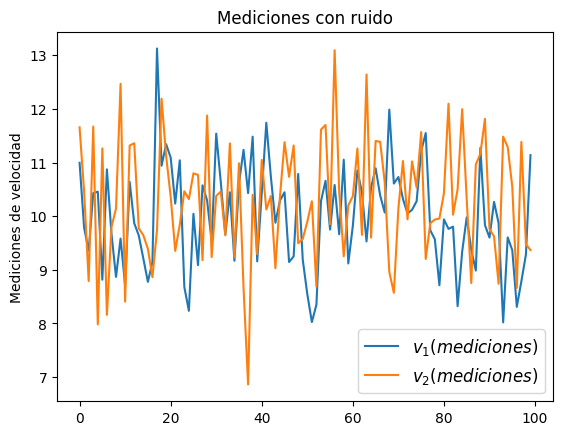

In [3]:
plt.plot(range(m),mx, label='$v_1 (mediciones)$')
plt.plot(range(m),my, label='$v_2 (mediciones)$')
plt.ylabel('Mediciones de velocidad')
plt.title('Mediciones con ruido')
plt.legend(loc='best',prop={'size':12})

plt.show()

## Inicialización de variables

Podemos inicializar las variables y matrices que se especifican en el modelo de la siguiente manera:

In [4]:
# Tamaño de paso para el filtro
dt = 0.1
# Matriz de identidad
I = np.eye(4)
# Matriz de estado
x = np.matrix([[0.0, 0.0, 0.0, 0.0]]).T
# Matriz P
P = np.diag([1000.0, 1000.0, 1000.0, 1000.0])
# Matriz A
A = np.matrix([[1.0, 0.0, dt, 0.0],
               [0.0, 1.0, 0.0, dt],
               [0.0, 0.0, 1.0, 0.0],
               [0.0, 0.0, 0.0, 1.0]])
# Matriz H
H = np.matrix([[0.0, 0.0, 1.0, 0.0],
               [0.0, 0.0, 0.0, 1.0]])
# Matriz R
r = 100.0
R = np.matrix([[r, 0.0],
               [0.0, r]])
# Matrices Q y G
s = 8.8
G = np.matrix([[0.5*dt**2],
               [0.5*dt**2],
               [dt],
               [dt]])
Q = G*G.T*s**2

## Algoritmo del Filtro de Kalman

In [5]:
# Las siguientes variables guardarán los resultados en cada iteración
xt = []
yt = []
dxt= []
dyt= []
Zx = []
Zy = []
Px = []
Py = []
Pdx= []
Pdy= []
Rdx= []
Rdy= []
Kx = []
Ky = []
Kdx= []
Kdy= []

**Algoritmo del Filtro de Kalman**

In [6]:
for n in range(len(measurements[0])):
  # Prediccieon
  # Predicción de estado
  x = A*x
  # Predicción de la covarianza del error
  P = A*P*A.T + Q
  # Actualizar pasos
  # Ganancia de Kalman
  S = H*P*H.T + R
  K = (P*H.T) * np.linalg.pinv(S)
  # Actualizar la estimación via Z
  Z = measurements[:,n].reshape(2,1)
  y = Z - (H*x)
  x = x + (K*y)
  # Covarianza del error
  P = (I - (K*H))*P

  # Guardando resultados
  xt.append(float(x[0]))
  yt.append(float(x[1]))
  dxt.append(float(x[2]))
  dyt.append(float(x[3]))
  Zx.append(float(Z[0]))
  Zy.append(float(Z[1]))
  Px.append(float(P[0,0]))
  Py.append(float(P[1,1]))
  Pdx.append(float(P[2,2]))
  Pdy.append(float(P[3,3]))
  Rdx.append(float(R[0,0]))
  Rdy.append(float(R[1,1]))
  Kx.append(float(K[0,0]))
  Ky.append(float(K[1,0]))
  Kdx.append(float(K[2,0]))
  Kdy.append(float(K[3,0]))

<ipython-input-6-d349b6f6e665>:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  xt.append(float(x[0]))
<ipython-input-6-d349b6f6e665>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yt.append(float(x[1]))
<ipython-input-6-d349b6f6e665>:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dxt.append(float(x[2]))
<ipython-input-6-d349b6f6e665>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you 

## Resultados

Medida de la velocidad:

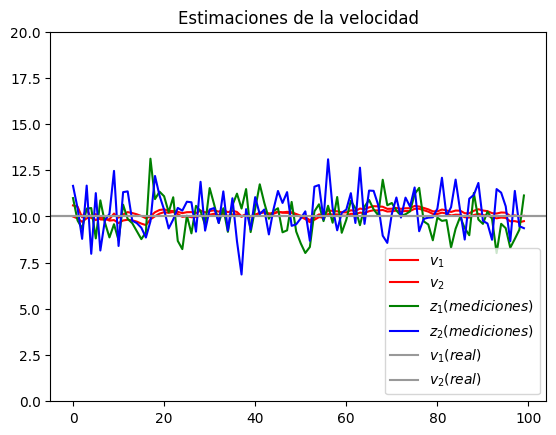

In [7]:
# Nuestras estimaciones en rojo
plt.plot(range(len(measurements[0])),dxt, label='$v_1$', c='r')
plt.plot(range(len(measurements[0])),dyt, label='$v_2$', c='r')

# Las mediciones ruidosas de la velocidad en ambas direcciones están en verde y azul
plt.plot(range(len(measurements[0])),mx, label='$z_1 (mediciones)$', c='g')
plt.plot(range(len(measurements[0])),my, label='$z_2 (mediciones)$', c='b')

# La velocidad constante en ambas direcciones en negro
plt.axhline(vx, color='#999999', label='$v_1(real)$')
plt.axhline(vy, color='#999999', label='$v_2(real)$')
plt.title('Estimaciones de la velocidad')
plt.legend(loc='best')
plt.ylim([0, 20])
plt.show()

Tracking de la posición:

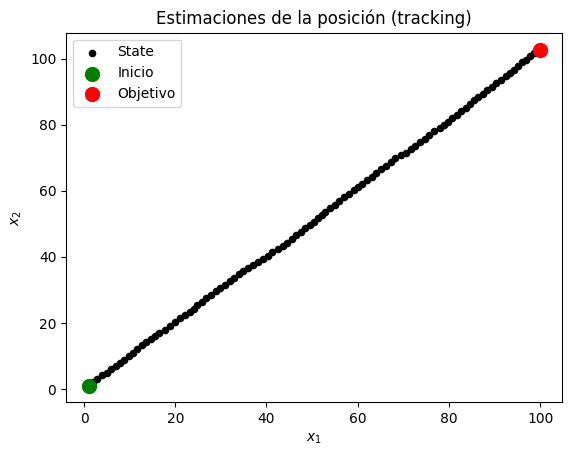

In [8]:
# Scatter plot de la estimación de posición de x e y en negro
# idealmente deberían formar una línea recta
plt.scatter(xt,yt, s=20, label='State', c='black')

# punto inicial en verde y punto final en rojo
plt.scatter(xt[0],yt[0], s=100, label='Inicio', c='g')
plt.scatter(xt[-1],yt[-1], s=100, label='Objetivo', c='r')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Estimaciones de la posición (tracking)')
plt.legend(loc='best')
plt.show()

---

Referencias:

* https://balzer82.github.io/Kalman/